## **1. 라이브러리 & 데이터 불러오기**

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%pwd

'/content'

In [4]:
!unzip '/content/drive/MyDrive/대회/데이터 크리에이터 캠프/Data/Data_3(테스트_트레인_분류).zip'

Archive:  /content/drive/MyDrive/대회/데이터 크리에이터 캠프/Data/Data_3(테스트_트레인_분류).zip
replace content/train_test/train/shoes/img21851.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
# 잘 압축이 풀어졌는지 확인
import os

test_bottoms_cnt = len(os.listdir("/content/content/train_test/test/bottoms"))
test_capandhat_cnt = len(os.listdir("/content/content/train_test/test/cap_and_hat"))
test_outerwear_cnt = len(os.listdir("/content/content/train_test/test/outerwear"))
test_shoes_cnt = len(os.listdir("/content/content/train_test/test/shoes"))
test_tops_cnt = len(os.listdir("/content/content/train_test/test/tops"))
print('테스트 데이터 수 :', test_bottoms_cnt + test_capandhat_cnt + test_outerwear_cnt + test_shoes_cnt + test_tops_cnt)

train_bottoms_cnt = len(os.listdir("/content/content/train_test/train/bottoms"))
train_capandhat_cnt = len(os.listdir("/content/content/train_test/train/cap_and_hat"))
train_outerwear_cnt = len(os.listdir("/content/content/train_test/train/outerwear"))
train_shoes_cnt = len(os.listdir("/content/content/train_test/train/shoes"))
train_tops_cnt = len(os.listdir("/content/content/train_test/train/tops"))
print('트레인 데이터 수 :', train_bottoms_cnt + train_capandhat_cnt + train_outerwear_cnt + train_shoes_cnt + train_tops_cnt)

테스트 데이터 수 : 6002
트레인 데이터 수 : 23998


## **2. 사진 자르기**

### **2.1 사진 자르기 함수 정의**

In [6]:
# 사진 자르는 함수 정의
def img_cut(img):
  #이미지 사진 불러오기
  image = cv2.imread(img)
  #cv2.IMREAD_GRAYSCALE로 흑백 이미지 읽기
  image_gray = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  
  #이미지에서 객체만 가져올 수 있도록 가우시안 블러 사용
  blur = cv2.GaussianBlur(image, ksize=(3,3), sigmaX=0)

  #canny를 사용하여 모서리를 찾기
  edged = cv2.Canny(blur, 10, 250)

  #엣지 이미지로 closed를 찾기 + 선 굵게 하여 경계를 이음
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
  closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

  contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  contours_xy = np.array(contours)
  contours_xy

  # x의 min과 max 찾기
  x_min, x_max = 0,0
  value = list()
  for i in range(len(contours_xy)):
      for j in range(len(contours_xy[i])):
          value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
          x_min = min(value)
          x_max = max(value)
  
  # y의 min과 max 찾기
  y_min, y_max = 0,0
  value = list()
  for i in range(len(contours_xy)):
      for j in range(len(contours_xy[i])):
          value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
          y_min = min(value)
          y_max = max(value)

  #이미지 자르기 위해 높이 넓이 구하기
  x = x_min
  y = y_min
  w = x_max-x_min
  h = y_max-y_min

  img_trim = image[y:y+h, x:x+w]
  cv2.imwrite('org_trim.jpg', img_trim)
  org_image = cv2.imread('org_trim.jpg')

  return org_image  

### **2.2 사진 자르기 잘 되나 테스트**

In [7]:
cut = img_cut('/content/content/train_test/test/bottoms/img10032.jpg')

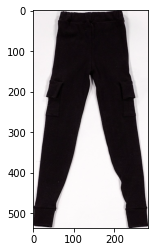

In [8]:
plt.imshow(cut.astype('uint8'))
plt.show()

### **2.3 자른 사진 넣을 폴더 생성**

In [21]:
# %rm -r "/content/Data_4(테스트_트레인 분류 + 사진 자르기)"

In [22]:
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)') # 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test') # 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/tops') # 상의 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/bottoms') # 하의 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/cap_and_hat') # 모자 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/outerwear') # 겉옷 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/shoes') # 신발 데이터 폴더

In [23]:
# os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)') # 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train') # 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/tops') # 상의 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms') # 하의 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/cap_and_hat') # 모자 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/outerwear') # 겉옷 데이터 폴더
os.mkdir('/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes') # 신발 데이터 폴더

### **2.4 사진 자르기 수행**

In [24]:
%cd /root

/root


In [25]:
none_cut_img = []

In [26]:
for i in os.listdir('/content/content/train_test/train/bottoms'):      
  
  try:
    img_loc = "/content/content/train_test/train/bottoms/" + i      
    img = img_cut(img_loc)
    num = i[3:]
    file_name = 'img' + str(num)
    
    cv2.imwrite("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/" + file_name, img) # 이미지 저장
  
  except:    
    none_cut_img.append(img_loc)    

for i in os.listdir('/content/content/train_test/train/cap_and_hat'):      
  
  try:
    img_loc = "/content/content/train_test/train/cap_and_hat/" + i      
    img = img_cut(img_loc)
    num = i[3:]
    file_name = 'img' + str(num)
    
    cv2.imwrite("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/cap_and_hat/" + file_name, img) # 이미지 저장
  
  except:    
    none_cut_img.append(img_loc)   

for i in os.listdir('/content/content/train_test/train/outerwear'):      
  
  try:
    img_loc = "/content/content/train_test/train/outerwear/" + i      
    img = img_cut(img_loc)
    num = i[3:]
    file_name = 'img' + str(num)
    
    cv2.imwrite("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/outerwear/" + file_name, img) # 이미지 저장
  
  except:    
    none_cut_img.append(img_loc)    

for i in os.listdir('/content/content/train_test/train/shoes'):      
  
  try:
    img_loc = "/content/content/train_test/train/shoes/" + i      
    img = img_cut(img_loc)
    num = i[3:]
    file_name = 'img' + str(num)
    
    cv2.imwrite("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes/" + file_name, img) # 이미지 저장
  
  except:    
    none_cut_img.append(img_loc)   

for i in os.listdir('/content/content/train_test/train/tops'):      
  
  try:
    img_loc = "/content/content/train_test/train/tops/" + i      
    img = img_cut(img_loc)
    num = i[3:]
    file_name = 'img' + str(num)
    
    cv2.imwrite("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/tops/" + file_name, img) # 이미지 저장
  
  except:    
    none_cut_img.append(img_loc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [27]:
for i in os.listdir('/content/content/train_test/test/bottoms'):      
  
  try:
    img_loc = "/content/content/train_test/test/bottoms/" + i      
    img = img_cut(img_loc)
    num = i[3:]
    file_name = 'img' + str(num)
        
    cv2.imwrite("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/bottoms/" + file_name, img) # 이미지 저장
  
  except:    
    none_cut_img.append(img_loc)    

for i in os.listdir('/content/content/train_test/test/cap_and_hat'):      
  
  try:
    img_loc = "/content/content/train_test/test/cap_and_hat/" + i      
    img = img_cut(img_loc)
    num = i[3:]
    file_name = 'img' + str(num)
    
    cv2.imwrite("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/cap_and_hat/" + file_name, img) # 이미지 저장
  
  except:    
    none_cut_img.append(img_loc)  

for i in os.listdir('/content/content/train_test/test/outerwear'):      
  
  try:
    img_loc = "/content/content/train_test/test/outerwear/" + i      
    img = img_cut(img_loc)
    num = i[3:]
    file_name = 'img' + str(num)
    
    cv2.imwrite("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/outerwear/" + file_name, img) # 이미지 저장
  
  except:    
    none_cut_img.append(img_loc)  

for i in os.listdir('/content/content/train_test/test/shoes'):      
  
  try:
    img_loc = "/content/content/train_test/test/shoes/" + i      
    img = img_cut(img_loc)
    num = i[3:]
    file_name = 'img' + str(num)
    
    cv2.imwrite("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/shoes/" + file_name, img) # 이미지 저장
  
  except:    
    none_cut_img.append(img_loc)  

for i in os.listdir('/content/content/train_test/test/tops'):      
  
  try:
    img_loc = "/content/content/train_test/test/tops/" + i      
    img = img_cut(img_loc)
    num = i[3:]
    file_name = 'img' + str(num)
    
    cv2.imwrite("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/tops/" + file_name, img) # 이미지 저장
  
  except:    
    none_cut_img.append(img_loc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [28]:
print('인식 못한 이미지 개수 : ', len(none_cut_img))

인식 못한 이미지 개수 :  261


### **2.5 개수 확인**

In [30]:
import os

test_bottoms_cnt = len(os.listdir("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/bottoms"))
test_capandhat_cnt = len(os.listdir("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/cap_and_hat"))
test_outerwear_cnt = len(os.listdir("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/outerwear"))
test_shoes_cnt = len(os.listdir("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/shoes"))
test_tops_cnt = len(os.listdir("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/test/tops"))
print('테스트 데이터 수 :', test_bottoms_cnt + test_capandhat_cnt + test_outerwear_cnt + test_shoes_cnt + test_tops_cnt)

train_bottoms_cnt = len(os.listdir("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms"))
train_capandhat_cnt = len(os.listdir("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/cap_and_hat"))
train_outerwear_cnt = len(os.listdir("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/outerwear"))
train_shoes_cnt = len(os.listdir("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/shoes"))
train_tops_cnt = len(os.listdir("/content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/tops"))
print('트레인 데이터 수 :', train_bottoms_cnt + train_capandhat_cnt + train_outerwear_cnt + train_shoes_cnt + train_tops_cnt)

테스트 데이터 수 : 5961
트레인 데이터 수 : 23778


In [49]:
print("자르기 안된 test_data : ", 6002 - 5961)
print("자르기 안된 train_data : ", 23998 - 23778)

자르기 안된 test_data :  41
자르기 안된 train_data :  220


In [52]:
len(none_cut_img) / 20

13.05

휜색의 이미지는 자르기가 안된다.
자르기가 안되는 사진은 그냥 학습에서 제외하자

In [53]:
plt.figure(figsize=(100,100))
for i in range(len(none_cut_img)):
  plt.subplot(21, 13, i+1)
  plt.xticks([]); plt.yticks([]) 

  img = plt.imread(none_cut_img[i]) 
  plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

### **2.6 데이터 저장**

In [54]:
!zip -r '/content/drive/MyDrive/데이터 크리에이터 캠프/Data/Data_4(테스트_트레인 분류 + 사진 자르기)' '/content/Data_4(테스트_트레인 분류 + 사진 자르기)/'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  adding: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img1635.jpg (deflated 0%)
  adding: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img50.jpg (deflated 0%)
  adding: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img4962.jpg (deflated 0%)
  adding: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img25137.jpg (deflated 1%)
  adding: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img15322.jpg (deflated 0%)
  adding: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img8444.jpg (deflated 0%)
  adding: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img27640.jpg (deflated 0%)
  adding: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img22842.jpg (deflated 1%)
  adding: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img24293.jpg (deflated 0%)
  adding: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img22862.jpg (deflated 0%)
  adding: content/Data_4(테스트_트레인 분류 + 사진 자르기)/train/bottoms/img22978.jpg (deflated 0%)
  adding: con